In [68]:
import numpy as np
from numpy import *

In [69]:
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float ,curLine))
        dataMat.append(fltLine)
    return dataMat

In [70]:
def distEclud(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB , 2)))


In [71]:
def randCent(dataSet,k):
    n = dataSet.shape[1]
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ  = float(np.max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k,1)
    return centroids

In [72]:
dataMat = np.mat(loadDataSet('testSet.txt'))
dataMat.shape

(80, 2)

In [73]:
np.max(dataMat[:,0]) ,np.min(dataMat[:,0]) , np.min(dataMat[:,1]),np.max(dataMat[:,1])

(4.838138, -5.379713, -4.232586, 5.1904)

In [74]:
randCent(dataMat,2)

matrix([[-4.63576309,  1.45273184],
        [-3.44545764, -3.53767974]])

In [75]:
def kMeans(dataSet , k ,distMeas=distEclud,createCent=randCent):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = createCent(dataSet ,k)
    clusterChanged = True
    while clusterChanged :
        clusterChanged = False
        for i in range(m):
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJT = distMeas(centroids[j,:],dataSet[i,:])
                if distJT < minDist:
                    minDist = distJT 
                    minIndex = j 
            if clusterAssment[i ,0] != minIndex :
                clusterChanged = True
            clusterAssment[i ,:] = minIndex , minDist **2
        print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A == cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust,axis=0)
    return centroids ,clusterAssment

In [76]:
myCentroids , clustAssing = kMeans(dataMat , 4)

[[ 1.39518766 -2.76623001]
 [-2.89262609  2.21310271]
 [-4.08636617 -2.19521641]
 [ 4.28544528  3.91541922]]
[[ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]
 [ 2.6265299   3.10868015]]


In [77]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] 
    for j in range(m):
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            #print ("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) 
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print ('the bestCentToSplit is: ',bestCentToSplit)
        print ('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment


In [78]:
dataMat3 = np.mat(loadDataSet('testSet2.txt'))
centList  , myNewAssMents = biKmeans(dataMat3,3)

[[ 2.30095831 -0.09428335]
 [ 3.98023    -3.07942068]]
[[-0.23255404  1.85591268]
 [ 0.408857   -3.54908071]]
[[-0.03082922  3.12682161]
 [-0.43154563 -2.87788837]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[ 2.90561679  1.57279994]
 [-1.49413066  1.8302204 ]]
[[ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
[[-0.80408024 -1.00455   ]
 [-1.77032818 -3.84502219]]
[[-0.62481413 -2.03253025]
 [-0.34955083 -3.27533917]]
[[-0.9555675  -1.96804713]
 [-0.12904858 -3.31832792]]
[[-1.26873575 -2.07139688]
 [ 0.07973025 -3.24942808]]
[[-1.26405367 -2.209896  ]
 [ 0.19848727 -3.24320436]]
[[-1.1836084 -2.2507069]
 [ 0.2642961 -3.3057243]]
[[-1.12616164 -2.30193564]
 [ 0.35496167 -3.36033556]]
the bestCentToSplit is:  0
the len of bestClustAss is:  40


In [79]:
centList

matrix([[ 2.93386365,  3.12782785],
        [-0.45965615, -2.7782156 ],
        [-2.94737575,  3.3263781 ]])

In [80]:
def distS(vecA ,vecB):
    a = np.sin(vecA[0,1]*np.pi/180) * np.sin(vecB[0,1] * np.pi / 180)
    b = np.cos(vecA[0,1]*np.pi/180) * np.cos(vecB[0,1] * np.pi / 180)*\
        np.cos(np.pi * (vecB[0,0]-vecA[0,0]) / 180)
    return np.arccos(a +b)*6371.0

In [81]:
import matplotlib 
import matplotlib.pyplot as plt

In [82]:
def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[[-122.68370297   45.60725158]
 [-122.66396092   45.5339534 ]]
[[-122.72070683   45.59796783]
 [-122.6231971    45.50414849]]
[[-122.73635922   45.569441  ]
 [-122.61597375   45.50373655]]
[[-122.74941346   45.545862  ]
 [-122.60434434   45.50451707]]
[[-122.74823556   45.52585431]
 [-122.59648847   45.50821685]]
[[-122.72797062   45.51642875]
 [-122.58031918   45.51010827]]
[[-122.7142141    45.51492203]
 [-122.56818551   45.5102949 ]]
[[-122.70981637   45.51478609]
 [-122.56409551   45.51016235]]
the bestCentToSplit is:  0
the len of bestClustAss is:  69
[[-122.78956175   45.46901145]
 [-122.7264533    45.55141736]]
[[-122.75334408   45.46622433]
 [-122.68369975   45.54392315]]
[[-122.49301766   45.52900512]
 [-122.41655642   45.44491816]]
[[-122.56789534   45.51561766]
 [-122.4975985    45.4146945 ]]
[[-122.56594641   45.51822194]
 [-122.54311867   45.41882033]]
the bestCentToSplit is:  0
the len of bestClustAss is:  32
[[-122.77001651   45.45939814]
 [-122.69321401   45.39786878]]


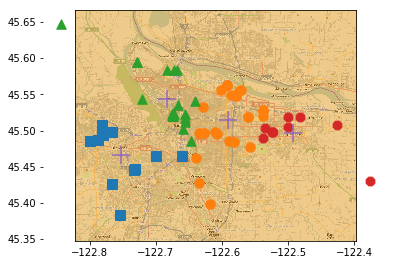

In [66]:
clusterClubs(4)